In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/CODESTUDIO-GIT/endtoend-ml-projects/master/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

### The Dataset consist of 50 start ups , The data is collected from 3 states New York,California,Florida.
### The variables used in this dataset are R&D Spend(i.e Research and Developement spend for company profit, Administration cost spen for company and Marketing cost spend for company)
### features : 
###     1) R&D Spend
###     2) Administration
###     3) Marketing Spend
### Label : 
###     Profit

In [8]:
# Exploratory Data Analysis
# 1) Find unwanted Columns
# there is no unwanted columns present in dataset as data is very less so no need to remove the columns

In [9]:
# 2) Finding the Mising Value
# so there is no missing value present in this Data 
# one way
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
# ṣecond way
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for features in features_na:
    print(feature, np.round(df[feature].isnull().sum().mean(),4) ,'%missing values')
else:
    print("there is no missing values")

there is no missing values


In [11]:
# 3) find features with one value
# checking the features having more than 1 unique value
for column in df.columns:
    print(column,df[column].nunique())

R&D Spend 49
Administration 50
Marketing Spend 48
State 3
Profit 50


In [12]:
# 4) Explore the categorical features
# So there is only 1 categorical columns present in dataset
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['State']

In [13]:
for feature in categorical_features:
    print(f"the feature is {feature} and unique count is {len(df[feature].unique())}")

the feature is State and unique count is 3


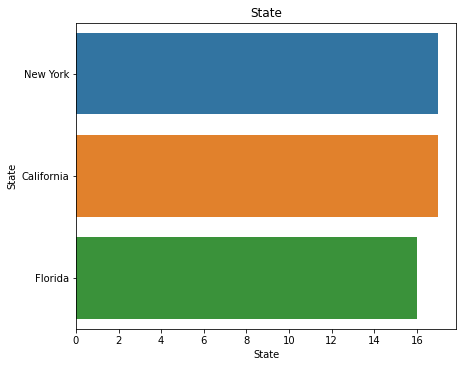

In [14]:
# 5) find the categorical distribution
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for categorical_feat in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feat,data=df)
    plt.xlabel(categorical_feat)
    plt.title(categorical_feat)
    plotnumber += 1
plt.show()

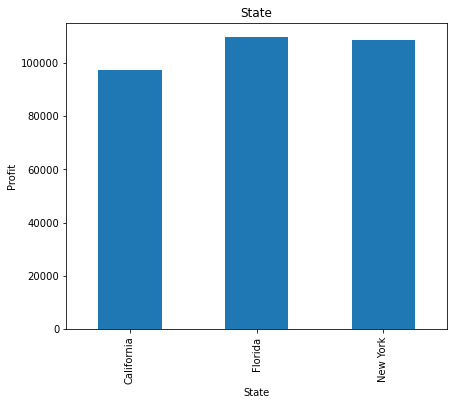

In [15]:
# 6) relationship between categorical features label columns 
# we can see that there is less profit in calefornia state as per the other state
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    data = df.copy()
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Profit")
    plt.title(feature)
    plotnumber += 1
plt.show()

In [16]:
# 7) Explore the Numerical features
# There are 3 numerical features present in this dataset 
# 'R&D Spend', 'Administration', 'Marketing Spend'
numerical_feature = [feature for feature in df.columns if ((df[feature].dtypes != 'O') and (feature not in ['Profit']))]
print("Number of numerical variables",numerical_feature)

Number of numerical variables ['R&D Spend', 'Administration', 'Marketing Spend']


In [20]:
# 8) To check the discrete value in features present or not
discrete_value = [feature  for feature in numerical_feature if len(df[feature].unique()) < 25]
print(f"Discrete Count {len(discrete_value)}")

Discrete Count 0


In [21]:
# 9) To check the continuous variable
continues_feature = [feature for feature in numerical_feature if ((df[feature].dtypes != 'O') and (feature not in ['Profit']))]
print("Number of numerical variables",continues_feature)

Number of numerical variables ['R&D Spend', 'Administration', 'Marketing Spend']


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

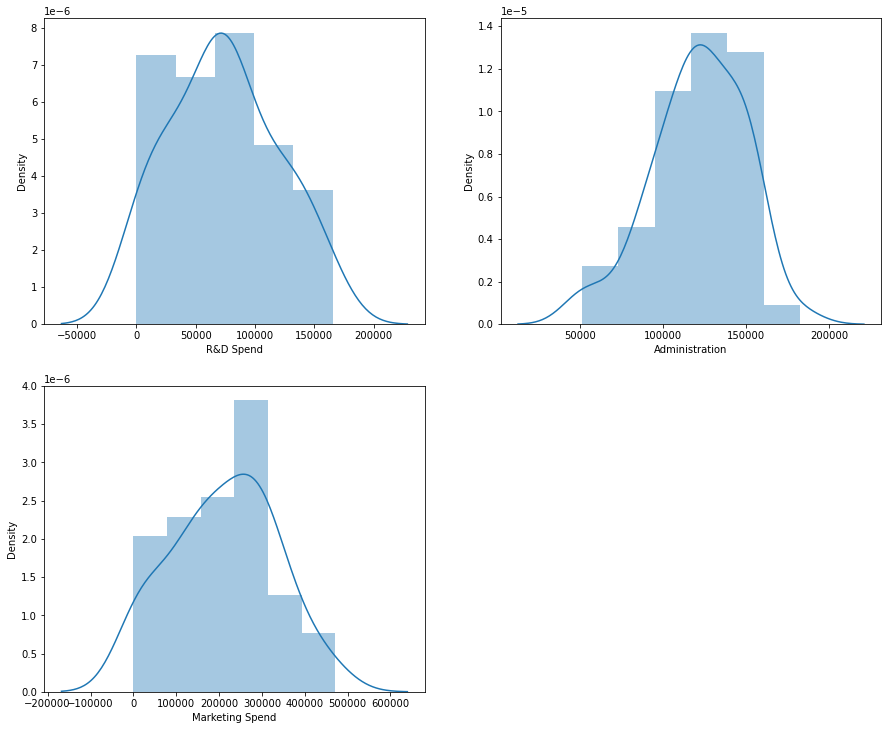

In [22]:
# 10) Distribution of Numerical features
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for continues_feat in continues_feature:
    ax = plt.subplot(12,2,plotnumber)
    data = df.copy()
    sns.distplot(df[continues_feat])
    plt.xlabel(continues_feat)
    plotnumber += 1
plt.show()

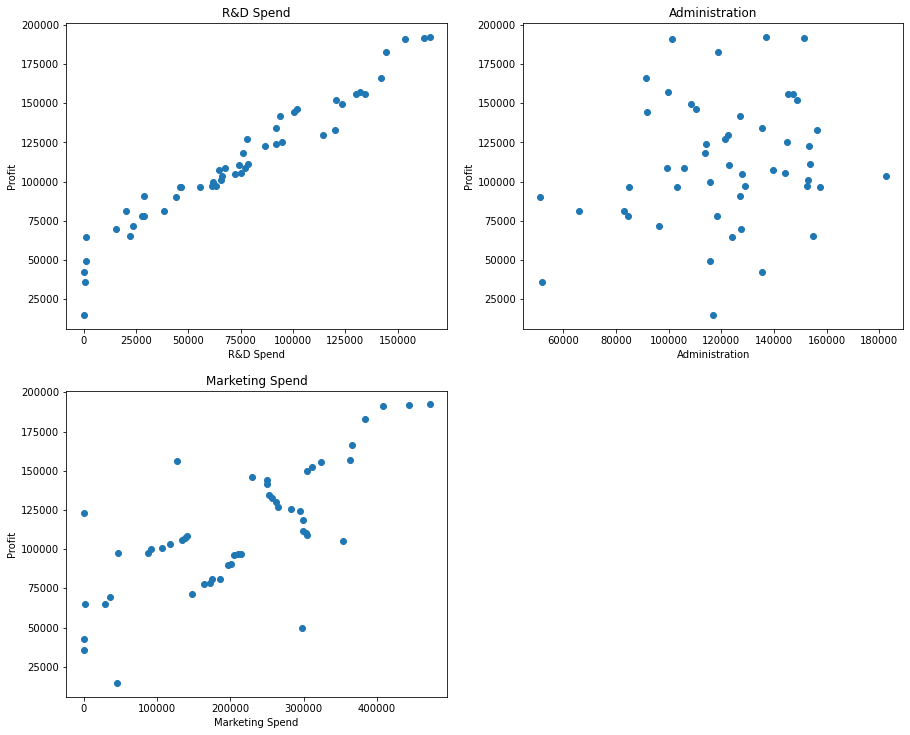

In [23]:
# 11) Relationship between numerical features and label columns
# It seems that the R&D Spend feature is linearly propertional to profit columns 
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for feature in continues_feature:
    ax = plt.subplot(12,2,plotnumber)
    data = df.copy()
    plt.scatter(data[feature],data['Profit'])
    plt.xlabel(feature)
    plt.ylabel("Profit")
    plt.title(feature)
    plotnumber += 1
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


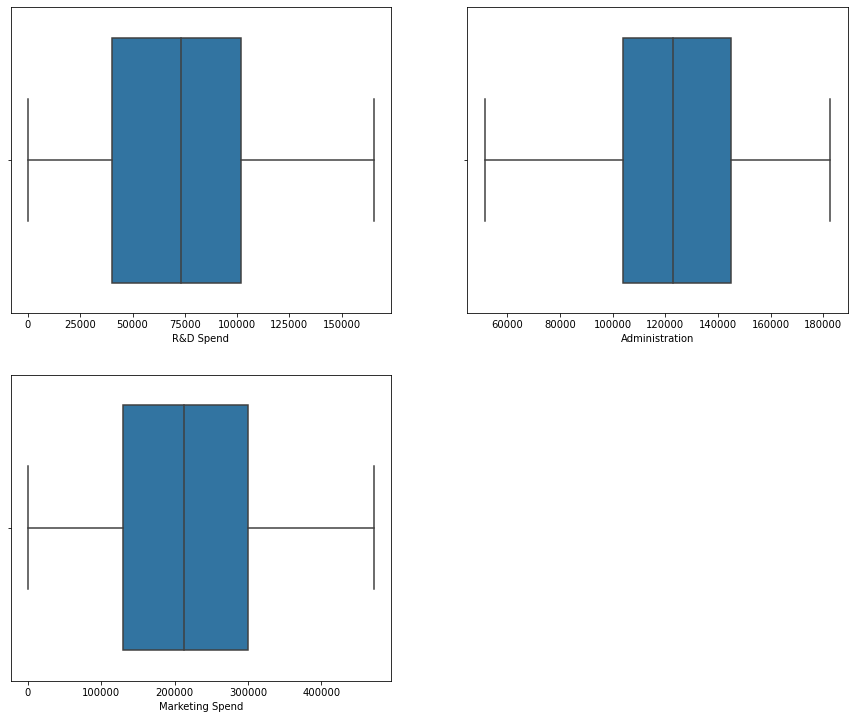

In [26]:
# 12) checking the outlier in dataset
# There is no outlier present in this data
plt.figure(figsize=(15,80),facecolor='white')
plotnumber = 1
for feature in numerical_feature:
    ax = plt.subplot(12,2,plotnumber)
    data = df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

<AxesSubplot:>

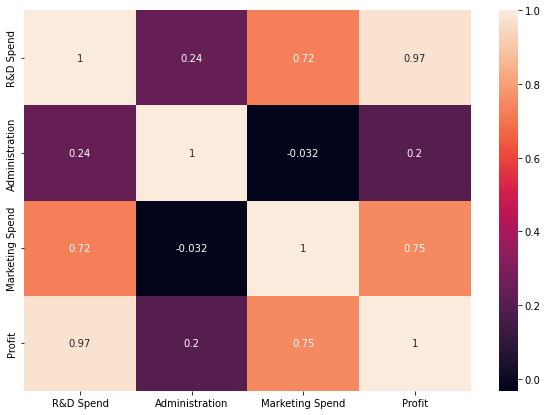

In [31]:
# 13 checking the correaltion of features with label data
corr_feat = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_feat,annot=True)


In [36]:

data_columns = {"data_columns": ["r&d spend", "administration", "marketing spend", "state_florida", "state_new york"]}
a = data_columns['data_columns']

In [54]:
for i in range(len(a)):
    print(i)

0
1
2
3
4
